# Multiple Linear Regression Analysis with Python

In [2]:
# Import the required libraries
# numpy for numerical operations
# pandas for data manipulation
# matplotlib.pyplot for data visualization
# statsmodels for statistical modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# Load the dataset from 'Advertising.csv'
# 'index_col=0' specifies that the first column in the CSV file should be treated as the row labels
df = pd.read_csv('Advertising.csv', index_col=0)

In [4]:
# Define the dependent variable 'y' as Sales
# This is the variable we aim to predict or explain
y = df['Sales']

# Define the independent variable 'X' as TV advertising budget
# This is the predictor variable
X = df['TV']

# Add a constant to the independent variable to include an intercept in the regression model
X = sm.add_constant(X)

In [5]:
# Fit the linear regression model using Ordinary Least Squares (OLS) method
# The OLS method minimizes the sum of squared differences between observed and predicted values
lr_model = sm.OLS(y, X).fit()

In [6]:
# Print the summary of the linear regression model to see the model's parameters and statistical tests
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           1.47e-42
Time:                        13:51:21   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [7]:
# Print the parameters of the model, i.e., the intercept and coefficients of the predictor variables
print(lr_model.params)

const    7.032594
TV       0.047537
dtype: float64


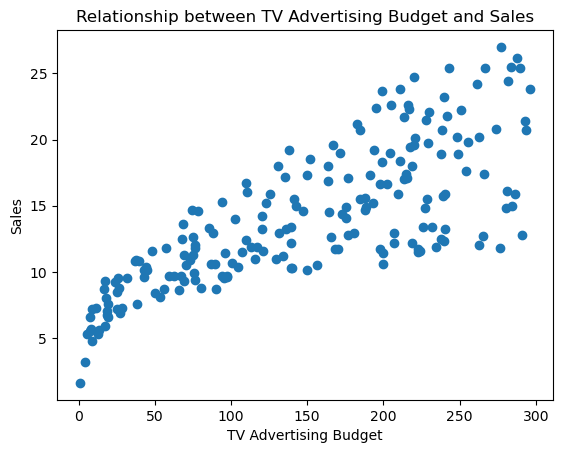

In [8]:
# Visualize the relationship between TV advertising budget and Sales with a scatter plot
# This helps in understanding how changes in the TV budget could affect Sales
plt.figure()
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Relationship between TV Advertising Budget and Sales')
plt.show()

In [8]:
# Single variable linear regression with 'Radio' as predictor
# Define the dependent variable 'Sales'
y = df['Sales']
# Define the independent variable 'Radio', adding a constant for the intercept
X = df['Radio']
X = sm.add_constant(X)
# Fit the linear regression model using Ordinary Least Squares (OLS) method
lr_model_radio = sm.OLS(y, X).fit()
# Print the summary statistics of the linear regression model
print(lr_model_radio.summary())
# Print the coefficients of the linear regression model
print(lr_model_radio.params)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           4.35e-19
Time:                        13:53:52   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.0

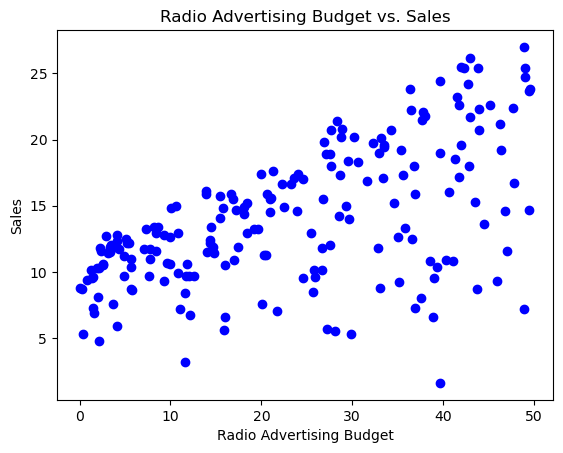

In [9]:
# Plot the relationship between 'Radio' advertising budget and 'Sales'
plt.figure()
plt.scatter(df['Radio'], df['Sales'], color='blue')  # Plot the data points
plt.xlabel('Radio Advertising Budget')  # Label for the x-axis
plt.ylabel('Sales')  # Label for the y-axis
plt.title('Radio Advertising Budget vs. Sales')  # Title of the plot
plt.show()

In [10]:
# Analyze the combined effect of TV and Radio advertising on Sales
# Multiple variable linear regression with 'TV' and 'Radio' as predictors
# Define the dependent variable 'Sales'
y = df['Sales']
# Define the independent variables 'TV' and 'Radio', adding a constant for the intercept
X = df[['TV', 'Radio']]
X = sm.add_constant(X)
# Fit the linear regression model using OLS method
lr_model_tv_radio = sm.OLS(y, X).fit()
# Print the summary statistics of the model
print(lr_model_tv_radio.summary())
# Print the coefficients of the model
print(lr_model_tv_radio.params)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           4.83e-98
Time:                        13:55:14   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

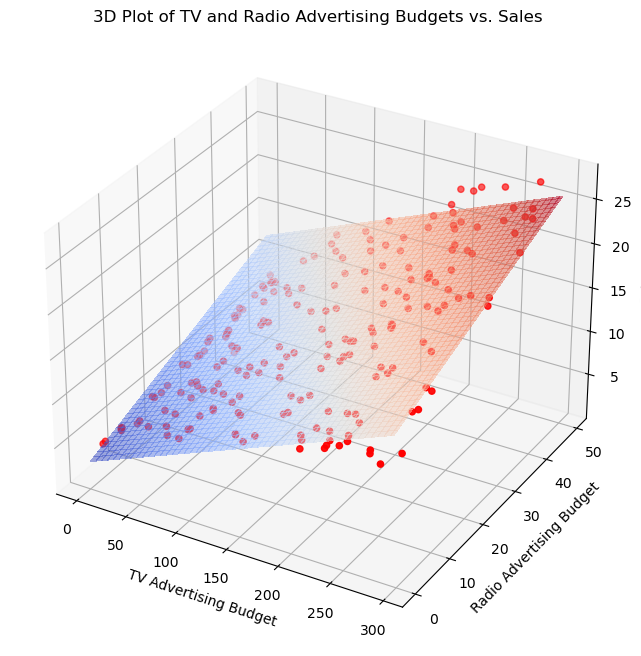

In [11]:
# 3D visualization of the effect of 'TV' and 'Radio' advertising budgets on 'Sales'
# Generate meshgrid for the 3D plot based on the 'TV' and 'Radio' data ranges
X_axis, Y_axis = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                             np.linspace(X.Radio.min(), X.Radio.max(), 100))
# Calculate the Z-axis values (predicted Sales) based on the regression model coefficients
Z_axis = lr_model_tv_radio.params[0] + lr_model_tv_radio.params[1] * X_axis + lr_model_tv_radio.params[2] * Y_axis
# Initialize the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface based on 'TV' and 'Radio' budgets and predicted 'Sales'
ax.plot_surface(X_axis, Y_axis, Z_axis, cmap='coolwarm', alpha=0.5, linewidth=0, antialiased=False)
# Scatter plot of actual data points for 'TV', 'Radio', and 'Sales'
ax.scatter(df['TV'], df['Radio'], df['Sales'], color='red')
# Labeling the axes
ax.set_xlabel('TV Advertising Budget')
ax.set_ylabel('Radio Advertising Budget')
ax.set_zlabel('Sales')
# Setting the title of the plot
ax.set_title('3D Plot of TV and Radio Advertising Budgets vs. Sales')
plt.show()